# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
path='C://Users//ualbertin//Documents//Springboard//Frequentist Case Study'
os.chdir(path)
medical = pd.read_csv('insurance2.csv')

In [17]:
medical.shape

(1338, 8)

In [18]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__The distribution does not appear to be Gaussian, so the mean doesn't sit in the middle like all the fake data from before.

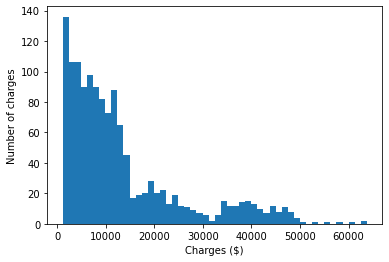

In [33]:
plt.hist(medical['charges'], bins=50)
plt.xlabel('Charges ($)')
plt.ylabel('Number of charges')
plt.show()

In [119]:
u = np.mean(medical['charges'])
print(u)

13270.422265141257


In [120]:
sigma=np.std(medical['charges'])
print(sigma)

12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__We can use the central limit theorem to sample repeatedly from the dataset to obtain the mean of the population sample, to check the above estimate of $13,270.

In [41]:
seed(47)
trials = list(map(lambda x: np.mean(np.random.choice(medical['charges'],10)), range(365)))
pop_u=np.mean(trials)
print(pop_u)

13287.882789566302


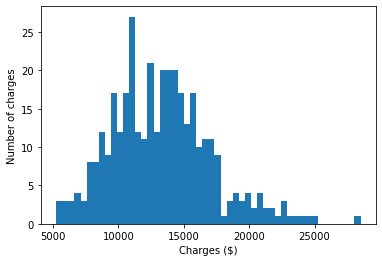

In [42]:
plt.hist(trials, bins=50)
plt.xlabel('Charges ($)')
plt.ylabel('Number of charges')
plt.show()

__A:__This resampling technique shows that the re-sampled mean of 13287 is close to the estimated mean of 13270 giving credence to the liklihood that the mean associated with it is the true mean of the population, and above the administrator's $12K level for concern.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval is more appropriate because the administrator is interested in the lower side of the mean, which lies below their operational model's cost.

In [43]:
standard_error = sigma / np.sqrt(len(medical['charges']))
print(standard_error)

330.943713906084


In [113]:
from scipy.stats import norm
#critical value for 95% interval
print(scipy.stats.t.ppf(q=.95,df=len(medical['charges'])))

1.645993261580807


In [109]:
from scipy.stats import t
df = len(medical['charges']) #degrees of freedom
value = t.ppf(0.95, df) #for 95% confidence interval
print(value)

1.645993261580807


In [117]:
se=scipy.stats.sem(medical['charges']) #calculate the standard error of the mean
print(se)

331.0674543156824


In [137]:
h = se * scipy.stats.t.ppf((1 + 0.95) / 2., len(medical['charges']-1)) #calculate the confidence intervals
print("mean minus 95% confidence interval:" + str(u-h))

mean minus 95% confidence interval:12620.954474003627


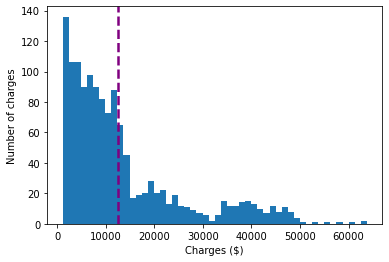

In [138]:
plt.hist(medical['charges'], bins=50)
plt.xlabel('Charges ($)')
plt.ylabel('Number of charges')
plt.axvline(x=(u-h), linestyle='--', linewidth=2.5, label='12620', c='purple')

plt.show()

The administrator doesn't need to worry since the 95% confidence interval does not include the hospital reaching the 12K level of concern.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ These equations assume that the variances between the two datasets are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ See below

In [65]:
has_ins = medical[medical.insuranceclaim==1] #Analyze those with insurance - n_1
has_ins.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [88]:
n_0 = len(has_ins) #number of samples
s_0 = np.std(has_ins['charges']) #standard deviation of sample charges
u_0 = np.mean(has_ins['charges']) #mean of sample charges
print("HAS INSURANCE n_samples="+str(n_1)+", std="+str(s_1)+", mean="+str(u_1))

HAS INSURANCE n_samples=783, std=14036.956250260411, mean=16423.928276537663


In [89]:
no_ins =  medical[medical.insuranceclaim==0]
no_ins.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [90]:
n_1 = len(no_ins) #number of samples
s_1 = np.std(no_ins['charges']) #standard deviation of sample charges
u_1 = np.mean(no_ins['charges']) #mean of sample charges
print("NO INSURANCE n_samples="+str(n_0)+", std="+str(s_0)+", mean="+str(u_0))

NO INSURANCE n_samples=783, std=14036.956250260411, mean=16423.928276537663


In [94]:
pooled_std = np.sqrt((((n_0 - 1)*(s_0**2)) + ((n_1 - 1)*(s_1**2)))/(n_0 + n_1 - 2)) #pooled standard deviation
print(pooled_std)

11512.282899205744


In [95]:
t_test_statistic = (u_0 - u_1)/(pooled_std * np.sqrt((1/n_0) + (1/n_1)))
print(t_test_statistic)

11.901306943555385


In [96]:
import scipy
from scipy import stats
stats.ttest_ind(has_ins['charges'], no_ins['charges'])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, there is no z-test in scipy, because it is nearly impossible to know the population variance, which is required for the Z-test. You can however, program it yourself and it also exists in other python libraries and also in R.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test